In [333]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [334]:
with open(f'dataframes/{44}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.758145e+09,1.758145e+09,"[156.75, 158.66, 159.8, 159.11, 158.73, 158.88...",915,1,5
1,Tag2,Tag1,1.758145e+09,1.758145e+09,"[33.53, 34.68, 34.98, 34.6, 34.29, 34.98, 34.7...",915,1,5


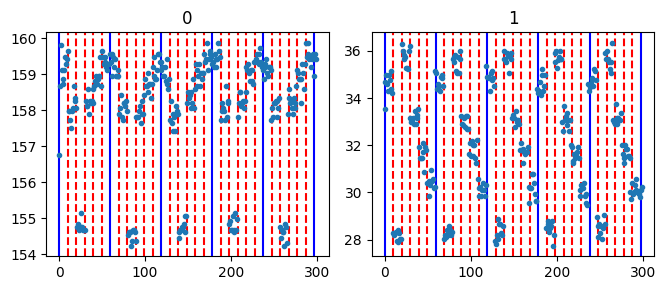

In [335]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(10,3))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [336]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[156.75, 158.66, 159.8, 159.11, 158.73, 158.88...","[159.11, 159.265, 159.03500000000003, 159.42, ...","[158.01, 158.16, 157.855, 158.01, 158.125]","[154.76, 154.61, 154.725, 154.69, 154.65]","[158.16, 157.855, 158.27499999999998, 158.2, 1...","[158.845, 158.66, 159.0, 159.075, 158.95999999...","[159.27, 159.15, 159.45499999999998, 159.34, 1...",915,1,5
1,Tag2,Tag1,"[33.53, 34.68, 34.98, 34.6, 34.29, 34.98, 34.7...","[34.68, 34.715, 34.87, 34.405, 34.675]","[28.27, 28.265, 28.23, 28.535, 28.57]","[35.705, 35.67, 35.705, 35.67, 35.52]","[33.15, 32.885000000000005, 33.07, 33.07, 33.07]","[31.740000000000002, 32.01, 31.7, 31.509999999...","[30.4, 30.135, 30.17, 30.060000000000002, 30.02]",915,1,5
